In [9]:
import numpy as np
import re
import gensim.downloader as api
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Exercises 1: Implement TF-IDF without using any TF-IDF library

In [10]:
# read file and process
with open("../lecture1/text.txt") as f:
    txt = f.read()

txt = re.split("\.", txt)
txt.remove('')
txt = [t.replace(",", "") for t in txt]
splitText = [re.split("\s", t.strip().lower()) for t in txt]

In [11]:
txt

['Bao giờ cho đến tháng ba\nẾch cắn cổ rắn tha ra ngoài đồng',
 '\nHùm nằm cho lợn liếm lông\nMột chục quả hồng nuốt lão tám mươi',
 '\nNắm xôi nuốt trẻ lên mười\nCon gà be rượu nuốt người lao đao',
 '\nLươn nằm cho trúm bò vào\nMột đàn cào cào đuổi bắt cá rô',
 '\nLúa mạ nhảy lên ăn bò\nCỏ năn cỏ lác rình mò bắt trâu',
 '\nGà con đuổi bắt diều hâu\nChim ri đuổi đánh vỡ đầu bồ nông']

In [12]:
splitText

[['bao',
  'giờ',
  'cho',
  'đến',
  'tháng',
  'ba',
  'ếch',
  'cắn',
  'cổ',
  'rắn',
  'tha',
  'ra',
  'ngoài',
  'đồng'],
 ['hùm',
  'nằm',
  'cho',
  'lợn',
  'liếm',
  'lông',
  'một',
  'chục',
  'quả',
  'hồng',
  'nuốt',
  'lão',
  'tám',
  'mươi'],
 ['nắm',
  'xôi',
  'nuốt',
  'trẻ',
  'lên',
  'mười',
  'con',
  'gà',
  'be',
  'rượu',
  'nuốt',
  'người',
  'lao',
  'đao'],
 ['lươn',
  'nằm',
  'cho',
  'trúm',
  'bò',
  'vào',
  'một',
  'đàn',
  'cào',
  'cào',
  'đuổi',
  'bắt',
  'cá',
  'rô'],
 ['lúa',
  'mạ',
  'nhảy',
  'lên',
  'ăn',
  'bò',
  'cỏ',
  'năn',
  'cỏ',
  'lác',
  'rình',
  'mò',
  'bắt',
  'trâu'],
 ['gà',
  'con',
  'đuổi',
  'bắt',
  'diều',
  'hâu',
  'chim',
  'ri',
  'đuổi',
  'đánh',
  'vỡ',
  'đầu',
  'bồ',
  'nông']]

In [13]:
# Count the number of word in the text
def numberLetter(word):
    c = 0
    for row in splitText:
        c = c + row.count(word)
    return c

In [14]:
# calculator TF anf IDF
TF = []
IDF = []

for row in splitText:
    tempIDF = []
    tempIF = []
    for w in row:
        tempIF.append(row.count(w) / len(row))
        tempIDF.append(np.log((len(splitText) + 1) / (numberLetter(w) + 1)))
    TF.append(tempIF)
    IDF.append(tempIDF)

In [15]:
# calculator TF-IDF
IF_IDF = []
for row in range(len(IDF)):
    tempIF_IDF = []
    for i in range(len(IDF[row])):
        tempIF_IDF.append(IDF[row][i] * TF[row][i])
    IF_IDF.append(tempIF_IDF)

In [31]:
np.array(IF_IDF).shape

(6, 14)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Dữ liệu giả định (3 tài liệu)
documents = [
    "I like to eat apples.",
    "Apples are delicious and nutritious.",
    "An apple a day keeps the doctor away."
]

# Khởi tạo vectorizer TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Tính toán ma trận TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Lấy danh sách các từ trong từ điển
words = tfidf_vectorizer.get_feature_names_out()

# Hiển thị ma trận TF-IDF
import pandas as pd
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=words, index=["Tài liệu 1", "Tài liệu 2", "Tài liệu 3"])
print(tfidf_df)


                  an       and     apple    apples       are      away  \
Tài liệu 1  0.000000  0.000000  0.000000  0.402040  0.000000  0.000000   
Tài liệu 2  0.000000  0.467351  0.000000  0.355432  0.467351  0.000000   
Tài liệu 3  0.377964  0.000000  0.377964  0.000000  0.000000  0.377964   

                 day  delicious    doctor       eat     keeps      like  \
Tài liệu 1  0.000000   0.000000  0.000000  0.528635  0.000000  0.528635   
Tài liệu 2  0.000000   0.467351  0.000000  0.000000  0.000000  0.000000   
Tài liệu 3  0.377964   0.000000  0.377964  0.000000  0.377964  0.000000   

            nutritious       the        to  
Tài liệu 1    0.000000  0.000000  0.528635  
Tài liệu 2    0.467351  0.000000  0.000000  
Tài liệu 3    0.000000  0.377964  0.000000  


In [33]:
import math

# Tính TF cho một từ trong tài liệu
def compute_tf(word, document):
    words = document.split()  # Tách tài liệu thành các từ
    word_count = words.count(word)  # Đếm số lần từ xuất hiện trong tài liệu
    tf = word_count / len(words)  # Tính TF
    return tf

# Tính IDF cho một từ trong tập dữ liệu
def compute_idf(word, documents):
    num_documents_containing_word = sum(1 for document in documents if word in document)  # Đếm số tài liệu chứa từ
    idf = math.log(len(documents) / (num_documents_containing_word + 1))  # Tính IDF
    return idf

# Tính TF-IDF cho một từ trong một tài liệu
def compute_tf_idf(word, document, documents):
    tf = compute_tf(word, document)
    idf = compute_idf(word, documents)
    tf_idf = tf * idf
    return tf_idf

# Dữ liệu giả định
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "Machine learning is a subfield of artificial intelligence that focuses on the development of algorithms and statistical models that enable computers to learn and make predictions or decisions without being explicitly programmed.",
    "In recent years, natural language processing (NLP) has made significant advancements, allowing computers to understand, interpret, and generate human language text.",
    "Data science is an interdisciplinary field that combines domain knowledge, programming skills, and statistical expertise to extract insights and knowledge from data.",
    "The Internet of Things (IoT) refers to the network of physical objects embedded with sensors, software, and other technologies that enable them to collect and exchange data."
]

# Tạo danh sách các từ trong từ điển
word_set = set()
for document in documents:
    words = document.split()
    word_set.update(words)

# Tạo ma trận TF-IDF
tf_idf_matrix = []
for document in documents:
    tf_idf_row = [compute_tf_idf(word, document, documents) for word in word_set]
    tf_idf_matrix.append(tf_idf_row)

# In ra ma trận TF-IDF
for i, row in enumerate(tf_idf_matrix):
    print(f"Tài liệu {i + 1}: {documents[i]}")
    print(row)
    print("\n")


Tài liệu 1: The quick brown fox jumps over the lazy dog.
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10181008131935056, 0.0, 0.0, -0.0, 0.10181008131935056, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05675840264066563, 0.0, 0.0, 0.0, 0.10181008131935056, 0.0, 0.0, 0.0, 0.10181008131935056, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10181008131935056, 0.0, 0.0, 0.0, 0.0, 0.0, 0.024793727923801082, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10181008131935056, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10181008131935056, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Tài liệu 2: Machine learning is a subfield of artificial intelligence that focuses on the development of algorithms and statistical models that enable computers to learn and make predictions or decisions without being explicitly programmed.
[0.0, 0.0, 0.0, 0.0, 0.028634085371067347, 0.0, 0.0, 0.0, 0.028634085371067347, 0.028634085371067347, 0.0, 0.02863408537106

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Dữ liệu giả định
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "Machine learning is a subfield of artificial intelligence that focuses on the development of algorithms and statistical models that enable computers to learn and make predictions or decisions without being explicitly programmed.",
    "In recent years, natural language processing (NLP) has made significant advancements, allowing computers to understand, interpret, and generate human language text.",
    "Data science is an interdisciplinary field that combines domain knowledge, programming skills, and statistical expertise to extract insights and knowledge from data.",
    "The Internet of Things (IoT) refers to the network of physical objects embedded with sensors, software, and other technologies that enable them to collect and exchange data."
]

# Khởi tạo vectorizer TF-IDF từ scikit-learn
tfidf_vectorizer = TfidfVectorizer()

# Tính toán ma trận TF-IDF sử dụng vectorizer
tfidf_matrix_sklearn = tfidf_vectorizer.fit_transform(documents)

# In ra ma trận TF-IDF từ scikit-learn
print("Ma trận TF-IDF từ scikit-learn:")
print(tfidf_matrix_sklearn.toarray())

# Tính ma trận TF-IDF bằng cách tự lập trình
# (sử dụng mã lập trình bạn đã viết trước đó)

# So sánh kết quả
if np.array_equal(tfidf_matrix_sklearn.toarray(), np.array(tf_idf_matrix)):
    print("Kết quả từ thư viện và kết quả tự lập trình giống nhau.")
else:
    print("Kết quả từ thư viện và kết quả tự lập trình khác nhau.")


Ma trận TF-IDF từ scikit-learn:
[[0.         0.         0.         0.         0.         0.
  0.         0.33721386 0.         0.         0.         0.
  0.         0.         0.33721386 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.33721386 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.33721386 0.         0.         0.33721386 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.33721386 0.         0.         0.         0.
  0.         0.33721386 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.4516721  0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.18885784 0.         0.         0.21279843 0.18885784
  0.18885784 0.         0.         0.         0.15236932 0.
  0.18885784 

# Excercises 2

### Download word2vec using gensim library and play around with the library

In [10]:
import gensim.downloader as api
model = api.load("word2vec-google-news-300")


In [11]:
model.most_similar("cat")

[('cats', 0.8099379539489746),
 ('dog', 0.760945737361908),
 ('kitten', 0.7464985251426697),
 ('feline', 0.7326234579086304),
 ('beagle', 0.7150582671165466),
 ('puppy', 0.7075453400611877),
 ('pup', 0.6934291124343872),
 ('pet', 0.6891531348228455),
 ('felines', 0.6755931973457336),
 ('chihuahua', 0.6709762215614319)]

In [12]:
word_vectors = model.most_similar("cat")

In [13]:
# keys_vector = []
# for k in word_vectors:
#     keys_vector.append(k[0])

keys_vector = model.index_to_key

In [14]:
keys_vector

['</s>',
 'in',
 'for',
 'that',
 'is',
 'on',
 '##',
 'The',
 'with',
 'said',
 'was',
 'the',
 'at',
 'not',
 'as',
 'it',
 'be',
 'from',
 'by',
 'are',
 'I',
 'have',
 'he',
 'will',
 'has',
 '####',
 'his',
 'an',
 'this',
 'or',
 'their',
 'who',
 'they',
 'but',
 '$',
 'had',
 'year',
 'were',
 'we',
 'more',
 '###',
 'up',
 'been',
 'you',
 'its',
 'one',
 'about',
 'would',
 'which',
 'out',
 'can',
 'It',
 'all',
 'also',
 'two',
 'after',
 'first',
 'He',
 'do',
 'time',
 'than',
 'when',
 'We',
 'over',
 'last',
 'new',
 'other',
 'her',
 'people',
 'into',
 'In',
 'our',
 'there',
 'A',
 'she',
 'could',
 'just',
 'years',
 'some',
 'U.S.',
 'three',
 'million',
 'them',
 'what',
 'But',
 'so',
 'no',
 'like',
 'if',
 'only',
 'percent',
 'get',
 'did',
 'him',
 'game',
 'back',
 'because',
 'now',
 '#.#',
 'before',
 'company',
 'any',
 'team',
 'against',
 'off',
 'This',
 'most',
 'made',
 'through',
 'make',
 'second',
 'state',
 'well',
 'day',
 'season',
 'says',
 'w

In [15]:
# Retrieve the vectors for the selected words
word_vectors = [model[word] for word in keys_vector]

In [16]:
word_vectors = np.array(word_vectors)

In [17]:
word_vectors.shape

(3000000, 300)

In [18]:

# Perform PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)


: 

In [ ]:
word_vectors_2d

array([[-0.54881006, -0.46093595],
       [-1.0714673 ,  0.42607465],
       [ 0.8899128 , -0.34481412],
       [ 0.01318568, -0.6803214 ],
       [-0.5647276 ,  0.5969945 ],
       [-0.614107  ,  0.57420313],
       [-0.3898137 , -0.3287714 ],
       [ 0.30744272, -0.7896644 ],
       [ 1.3526285 ,  1.4754502 ],
       [ 0.8964374 , -0.684343  ],
       [-0.27068162,  0.2161283 ]], dtype=float32)

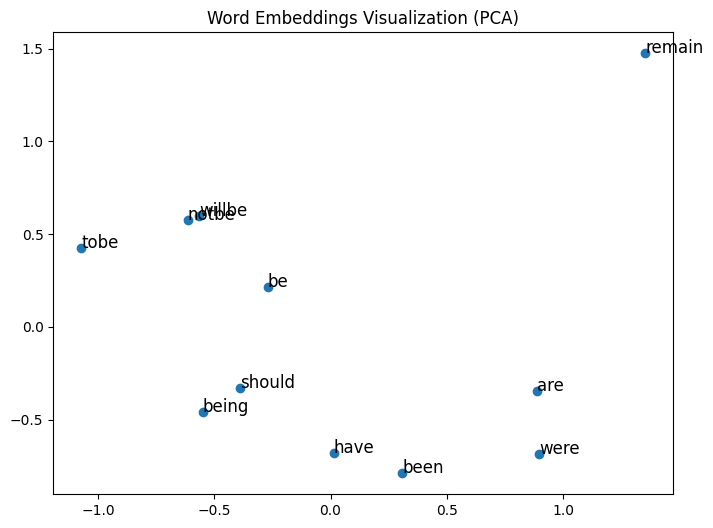

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o')

for i, word in enumerate(keys_vector):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), fontsize=12)

plt.show()
